In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Set 4

## 1. Simulations
#### 1.

In [55]:
college = pd.read_csv("../Data/college-admissions.csv.bz2")
college = college[['Research', 'Chance of Admit ']]
print("Shape of data: ", college.shape)
print("NA's: ", college.isna().sum())
college.head()

Shape of data:  (400, 2)
NA's:  Research            0
Chance of Admit     0
dtype: int64


,Research,Chance of Admit
0,1,0.92
1,1,0.76
2,1,0.72
3,1,0.80
4,0,0.65


#### 2.

In [68]:
adm_mean = np.mean(college['Chance of Admit '])
adm_med = np.median(college['Chance of Admit '])
adm_sd = np.std(college['Chance of Admit '])
adm_range = college.max()['Chance of Admit '] - college.min()['Chance of Admit ']
print("Avg. admissions chance: ", adm_mean)
print("Median admissions chance: ", adm_med)
print("Standard deviation of admissions chance: ", adm_sd)
print("Range of admissions chance: ", adm_range)
college1 = college[college["Research"] > 0]
r_mean = np.mean(college1['Chance of Admit '])
college0 = college[college["Research"] < 1]
nr_mean = np.mean(college0['Chance of Admit '])
print("Mean admissions with research: ", r_mean, "Compared to without research: ", nr_mean)

Avg. admissions chance:  0.7243499999999996
Median admissions chance:  0.73
Standard deviation of admissions chance:  0.1424309569580995
Range of admissions chance:  0.6299999999999999
Mean admissions with research:  0.7959817351598172 Compared to without research:  0.6376795580110497


There is a higher chance of amdission if you're involved in research, according to this data.

#### 3.

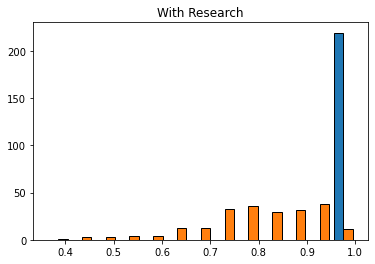

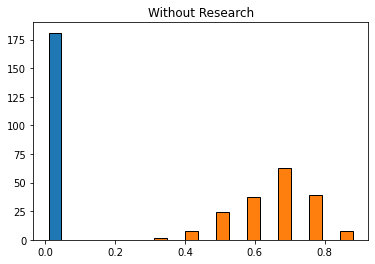

In [71]:
plt.hist(college1, bins = 'auto', edgecolor = "black")
plt.title("With Research")
plt.show()

plt.hist(college0, bins = 'auto', edgecolor = "black")
plt.title("Without Research")
plt.show()

Nope, these chances are not normally distributed. Skewed right and skewed left.

#### 4.

In [76]:
r_diff = r_mean - nr_mean
print("Difference between research vs no research mean:",r_diff)

Difference between research vs no research mean: 0.1583021771487675


#### 5.

In [77]:
print("Avg. H0 admissions chance: ", adm_mean)
print("Standard deviation of H0 admissions chance: ", adm_sd)

Avg. H0 admissions chance:  0.7243499999999996
Standard deviation of H0 admissions chance:  0.1424309569580995


#### 6.

In [87]:
faker = np.random.normal(adm_mean,adm_sd, size=200) #create fakeresearchers
fakenr = np.random.normal(adm_mean, adm_sd, size=200) #create6fakenon-researchers
print("Difference between test means:", np.mean(faker) - np.mean(fakenr))
print("Compared to the real data:", r_diff)

Difference between test means: 0.0006899868443989154
Compared to the real data: 0.1583021771487675


#### 7.
Because we are using the data for all students combined so we have to use the mean from the dame data.

#### 8.

In [95]:
R = 1000
pollmeans1 = []
pollmeans0 = []
polldiff = []
for i in range(R):
    mean1 = np.random.normal(faker, 200).mean()
    pollmeans1.append(mean1)
    mean0 = np.random.normal(fakenr, 200).mean()
    pollmeans0.append(mean0)
    polldiff.append(mean1 - mean0)

#### 9.

In [98]:
print("Mean of differences through 1000 trials:", np.mean(polldiff))

Mean of differences through 1000 trials: -0.013732302756991487


We get a result this close to 0 because it is following a normal distribution where the center of the differences will be around 0.

#### 10.

In [162]:
absdiff = np.abs(polldiff) # absolute value of polldif
print("The max mean difference is:" ,max(absdiff))

The max mean difference is: 69.46714944983232


#### 11.

In [104]:
np.percentile(polldiff, 2.5) # lower 2.5 percentile

-39.62036125927491

np.percentile(polldiff, 97.5) # 97.5-th percentile

The actual data value of 0.158 does fall within the confidence interval.

#### 12.
Based off the simulations, we are still able to assume that researchers and non-researchers have similar admission chances. The number 0.158, however, does not appear to be a fluke because it falls within our confidence interval.

## 2.
#### 1.

In [131]:
nr_std = np.std(college0['Chance of Admit ']) #std for non-researchers 
nr_sz = college0['Chance of Admit '].count() #std for non-researchers 
r_std = np.std(college0['Chance of Admit ']) #std for researchers 
r_sz = college1['Chance of Admit '].count() #count for researchers 
se = np.sqrt((r_std)**2 / r_sz + (nr_std)**2 / nr_sz) # standard error calculation
print("Standard error:", se)

Standard error: 0.011398480675663639


#### 2.

In [139]:
int1 = r_diff + 2.249893 * se # interval 1 of 95% 
int2 = r_diff - 2.249893 * se # interval 2 of 95% 
print("The 95% confidence int. is:", int2, "-", int1)

The 95% confidence int. is: 0.1326568152659566 - 0.18394753903157837


#### 3.
Based off this testing, we fail to reject H0 because the value 0.158 does fit within the confidence interval.

#### 4

In [161]:
t = r_diff / se # ttest calculation
t

13.888006801358276

#### 5.
This would be very unlikely, and the value would be to the right side of the table. This large score indicates that the two groups are very different.

## 3.

#### 1.

In [148]:
from scipy import stats

In [159]:
bruh0 = college0['Chance of Admit ']
bruh1 = college1['Chance of Admit ']
stats.ttest_ind(bruh0, bruh1)

Ttest_indResult(statistic=-13.248168764786403, pvalue=1.918173380692434e-33)

#### 2.

All three methods agree that we fail to reject H0. We are not able to prove that researchers have a better chance of admission compared to non-researchers.

## Extra credit:


In [160]:
## time constraints